In [2]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
y=df.Survived
features=df[['Pclass','Sex','Age','Fare']]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
le_Sex=le.fit_transform(features.Sex)
features['le_sex']=le_Sex
X=features[['Pclass','Age','Fare','le_sex']]

C:\Users\Saurabh Sinha\AppData\Local\Temp\ipykernel_21024\876559375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['le_sex']=le_Sex


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dce=DecisionTreeClassifier()
dce.fit(X_train,y_train)
dce.score(X_train,y_train)

0.9795918367346939

In [28]:
dce.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [29]:
y_test

511    0
99     0
421    0
800    0
792    0
7      0
569    1
69     0
507    1
Name: Survived, dtype: int64

In [32]:
y_predict=dce.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[5, 2],
       [2, 0]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

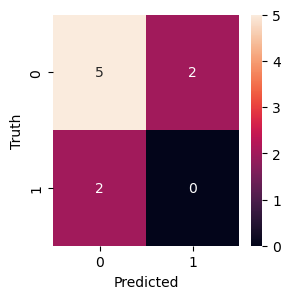

In [36]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (3,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')